In [1]:
import pandas as pd
from pathlib import Path
import statsmodels.formula.api as sm
import numpy as np

In [2]:
interim = '../data/interim'
br = pd.read_pickle(Path(interim) / 'batting_records.pkl')

In [41]:
br = br.sort_values(['BAT_ID', 'year'])
br_pred = br.loc[:, ['BAT_HAND', 'G', 'BBPG', 'ABPG', 'HPG', 'HPPA']].groupby('BAT_ID').shift(1)
br_pred = br_pred.dropna(subset=['G'])

br_pred['w_HPPA'] = br_pred['HPPA'] * br_pred['G']

br_pred['sum_w_HPPA'] = br_pred.groupby('BAT_ID')['w_HPPA'].transform(lambda x: x.rolling(4, 1).mean())
br_pred['sum_G'] = br_pred.groupby('BAT_ID')['G'].transform(lambda x: x.rolling(4, 1).mean())
br_pred['pred_HPPA'] = (br_pred['sum_w_HPPA'] / br_pred['sum_G'])

del br_pred['HPPA']

br_pred = br_pred.rename(columns={'G': 'prev_G'})

In [42]:
merged = pd.merge(br, br_pred, on=['BAT_ID', 'year'])
merged['HPPA'] = merged['HPPA'].astype('float')
merged['pred_HPPA'] = merged['pred_HPPA'].astype('float')

In [43]:
limited = merged[(merged.G >= 50) & (merged.prev_G >= 50)]
result = sm.ols(formula="HPPA ~ pred_HPPA", data=limited).fit()

In [44]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   HPPA   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     8007.
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:08:05   Log-Likelihood:                 46833.
No. Observations:               21755   AIC:                        -9.366e+04
Df Residuals:                   21753   BIC:                        -9.365e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0761      0.002     41.762      0.0

<AxesSubplot:xlabel='HPPA', ylabel='pred_HPPA'>

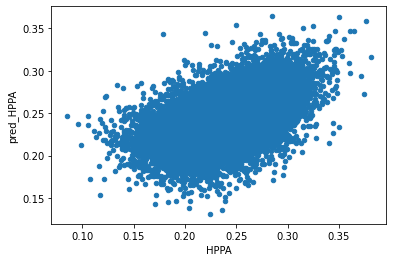

In [45]:
limited.plot.scatter(x='HPPA', y='pred_HPPA')

In [46]:
br = br.sort_values(['BAT_ID', 'year'])

In [47]:
br_pred = br.loc[:, ['G', 'HPPA']]
br_pred['w_HPPA'] = br_pred['HPPA'] * br_pred['G']

br_pred['sum_w_HPPA'] = br_pred.groupby('BAT_ID')['w_HPPA'].transform(lambda x: x.rolling(5, 1).mean())
br_pred['sum_G'] = br_pred.groupby('BAT_ID')['G'].transform(lambda x: x.rolling(5, 1).mean())
br_pred['pred_HPPA'] = (br_pred['sum_w_HPPA'] / br_pred['sum_G']).shift(1)
br_pred['prev_G'] = br_pred['G'].shift(1)

In [48]:
br_pred = br_pred.loc[:, ['prev_G', 'pred_HPPA']]

In [49]:
merged = pd.merge(br, br_pred, on=['BAT_ID', 'year'])
merged['HPPA'] = merged['HPPA'].astype('float')
merged['pred_HPPA'] = merged['pred_HPPA'].astype('float')

In [50]:
limited = merged[(merged.G >= 50) & (merged.prev_G >= 50)]
result = sm.ols(formula="HPPA ~ pred_HPPA", data=limited).fit()

In [51]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   HPPA   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     7844.
Date:                Thu, 18 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:08:31   Log-Likelihood:                 47275.
No. Observations:               22009   AIC:                        -9.455e+04
Df Residuals:                   22007   BIC:                        -9.453e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0763      0.002     41.572      0.0

<AxesSubplot:xlabel='HPPA', ylabel='pred_HPPA'>

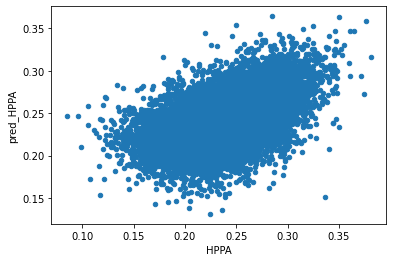

In [52]:
limited.plot.scatter(x='HPPA', y='pred_HPPA')